Decision Tree using Cnn features:

DECISION TREE(CNN)

In [ ]:
import numpy as np

def entropy(labels):
    """Compute entropy of a given label distribution."""
    _, counts = np.unique(labels, return_counts=True)  # Get unique labels and their counts
    probabilities = counts / counts.sum()  # Compute probabilities
    return -np.sum(probabilities * np.log2(probabilities))  # Entropy formula


In [ ]:
import numpy as np
import pandas as pd

def compute_information_gain(data, feature_index, labels, threshold):
    """
    Computes information gain for a given feature and threshold.
    """
    E_S = entropy(labels)  # Initial entropy
    mask = data[:, feature_index] < threshold  # Boolean mask for splitting

    left, right = labels[mask], labels[~mask]  # Efficiently split labels

    # Compute weighted entropy
    left_ratio = len(left) / len(labels)
    right_ratio = 1 - left_ratio  # Since left + right = total

    E_left, E_right = entropy(left), entropy(right)
    info_gain = E_S - (left_ratio * E_left + right_ratio * E_right)

    return info_gain


def best_split(data, labels):
    """
    Finds the best feature index and threshold for splitting the dataset.
    """
    if isinstance(data, pd.DataFrame):
        data = data.to_numpy()  # Convert DataFrame to NumPy array if needed

    n, m = data.shape
    max_info_gain, best_feature, best_threshold = -np.inf, None, None

    for i in range(m):
        sorted_values = np.unique(data[:, i])  # Unique values instead of sorting
        thresholds = (sorted_values[:-1] + sorted_values[1:]) / 2  # Midpoints

        for threshold in thresholds:
            info_gain = compute_information_gain(data, i, labels, threshold)

            if info_gain > max_info_gain:
                max_info_gain, best_feature, best_threshold = info_gain, i, threshold

    return best_feature, best_threshold


In [ ]:
import numpy as np
class DecisionTreeNode:
    """Class for a decision tree node."""
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class DecisionTree:
    def __init__(self, max_depth=23):
        self.max_depth = max_depth
        self.root = None

    def fit(self, X_train, y_train, depth=0):
        """Recursively builds the decision tree."""
        # Base case: Stop splitting if pure or max depth reached
        n,m=X_train.shape
        if depth == self.max_depth or len(np.unique(y_train)) == 1:
            return DecisionTreeNode(value=np.bincount(y_train).argmax()) #

        # Find best feature and threshold
        best_feature, best_threshold = best_split(X_train, y_train)

        # Partition X_train
        # Convert DataFrame to NumPy array before indexing with [:, best_feature]
        # Check if X_train is already a NumPy array
        if not isinstance(X_train, np.ndarray):
            X_train_np = X_train.to_numpy()
        else:
            X_train_np = X_train
        left_mask = (X_train_np[:, best_feature] <= best_threshold)
        right_mask = (X_train_np[:, best_feature] > best_threshold)



        if np.all(left_mask) or np.all(right_mask):  # Prevent infinite splitting
            return DecisionTreeNode(value=np.bincount(y_train).argmax())

        # Convert the masks back to index for DataFrame slicing
        # Check if X_train is a DataFrame before using .index and .loc
        if isinstance(X_train, pd.DataFrame):
            left_indices = X_train.index[left_mask]
            right_indices = X_train.index[right_mask]
            left_child = self.fit(X_train.loc[left_indices], y_train[left_mask], depth + 1)
            right_child = self.fit(X_train.loc[right_indices], y_train[right_mask], depth + 1)
        else:  # Handle the case where X_train is a NumPy array
            left_child = self.fit(X_train_np[left_mask], y_train[left_mask], depth + 1)
            right_child = self.fit(X_train_np[right_mask], y_train[right_mask], depth + 1)

        return DecisionTreeNode(feature=best_feature, threshold=best_threshold, left=left_child, right=right_child)

    def train(self, X_train, y_train):
        """Initialize tree training."""
        self.root = self.fit(X_train, y_train, depth=0)

Using PCA features:


In [ ]:
import gdown
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
file_id = "1EFQlS9C4YGT5CNjD_NX_Q-HaiyLH4sjE"

# Construct the direct download URL
download_url = f"https://drive.google.com/uc?id={file_id}"

# Download the file
output = "data.csv"  # Change filename as needed
gdown.download(download_url, output, quiet=False)

# Read the CSV file
data = pd.read_csv(output)
data = data.dropna()

X = data.drop(columns = ['label'])
y = data['label']


y


Downloading...
From (original): https://drive.google.com/uc?id=1EFQlS9C4YGT5CNjD_NX_Q-HaiyLH4sjE
From (redirected): https://drive.google.com/uc?id=1EFQlS9C4YGT5CNjD_NX_Q-HaiyLH4sjE&confirm=t&uuid=ff2400e6-483c-43aa-b762-ea9539025e83
To: /content/data.csv
100%|██████████| 943M/943M [00:42<00:00, 22.2MB/s]


,label
0,249
1,249
2,249
3,249
4,249
...,...
20175,2
20176,2
20177,2
20178,2


In [ ]:
# Mean
X_mean = X.mean()

# Standard deviation
X_std = X.std()

# Standardization
Z = (X - X_mean) / X_std.replace(0,1e-10)

In [ ]:
from sklearn.decomposition import PCA

# Taking top 300 dimensions
pca = PCA(n_components=50)
pca.fit(Z)
x_pca = pca.transform(Z)

# Create the dataframe
df = pd.DataFrame(x_pca,
                       columns=['PC{}'.
                       format(i+1)
                        for i in range(50)])
df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
0,-13.473498,14.170484,-8.592971,-0.276517,-4.310723,-12.837154,0.117501,-2.762181,1.108688,-0.903631,...,4.530771,6.331565,1.346296,3.809071,-5.744589,-1.152946,-3.128881,2.276966,3.356538,-0.629764
1,-7.392499,21.470417,-16.521425,-9.054980,10.826069,2.505705,9.917916,6.224161,10.179304,1.490338,...,8.227873,4.883053,-6.482553,-5.143685,-9.066822,2.787846,3.202459,-1.610316,-0.207071,0.701707
2,-11.364221,4.819343,-5.701314,-9.767065,-3.730641,-13.074379,-4.602752,-2.721665,0.244425,4.565919,...,-1.233233,-3.900859,-9.745921,2.400132,1.972621,-2.944900,1.652332,-0.130063,-0.706819,2.979597
3,-9.464440,4.396213,-14.905358,-3.827589,-1.930127,-7.333128,1.197881,-2.875503,-3.849588,2.172650,...,-1.741693,9.245959,2.735081,4.228594,-1.277832,0.237612,4.868304,3.123260,0.564671,-0.737402
4,-3.514694,4.805839,-10.267748,6.538962,-6.552479,2.683371,-3.320804,-6.300914,-4.508241,6.067486,...,3.896664,1.172886,-5.018848,-2.146144,-2.998995,5.402277,1.805240,4.362263,3.392728,0.034000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20175,-3.464935,7.745460,-29.708591,-10.414638,14.356317,2.594469,-5.300906,7.074590,-3.785519,-4.540286,...,-6.751631,3.089146,9.977387,11.882000,6.328500,-5.698331,-1.924080,0.682491,1.192802,2.894069
20176,-6.965887,8.512735,-5.489307,1.021765,0.134595,-6.489988,-11.259463,5.767920,-6.178737,-8.469632,...,-1.534494,2.210749,-1.822619,9.738817,5.370926,1.935890,-0.663755,-3.745459,-7.864647,2.700456
20177,-10.654562,-4.086706,-9.890634,-5.559354,9.865361,8.734752,0.327979,1.586655,5.016656,0.548684,...,1.643995,-1.244557,-2.351891,1.500250,-2.523203,5.640252,-0.027637,5.528573,-0.145868,6.559754
20178,6.125788,-1.236722,-12.704954,-12.068882,0.344320,-0.449144,-0.514557,1.223814,0.730108,7.294215,...,-1.892699,-3.245218,3.015754,6.639884,-0.370097,6.895240,5.026860,-1.990462,0.792913,3.696527


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.40, random_state=42) # 60 - 40% train test split
X_train = np.array(X_train, dtype=np.float64)  # Ensure all features are numeric



In [ ]:
print(X_train.shape)

(12108, 50)


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from tqdm import tqdm

# Ensure data is of correct type
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)
y_train = y_train.astype(np.int64)
y_test = y_test.astype(np.int64)







In [ ]:
# Train the tree:
from tqdm import tqdm

tree = DecisionTree(max_depth=23)

# Simulating progress for training (if tree.train() has multiple steps)
for _ in tqdm(range(1), desc="Training Decision Tree"):
    tree.train(X_train, y_train)

Training Decision Tree: 100%|██████████| 1/1 [1:11:57<00:00, 4317.58s/it]


Custom Decision Tree Accuracy: 0.1068


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Scikit-learn Decision Tree Accuracy: 0.1023

Classification Report:
              precision    recall  f1-score   support

           0       0.04      0.06      0.05        33
           1       0.04      0.06      0.05        33
           2       0.02      0.03      0.03        33
           3       0.00      0.00      0.00        36
           4       0.21      0.27      0.24        30
           5       0.00      0.00      0.00        38
           6       0.03      0.08      0.04        25
           7       0.09      0.12      0.10        25
           8       0.02      0.04      0.03        27
           9       0.08      0.17      0.11        36
          10       0.02      0.04      0.03        23
          11       0.00      0.00      0.00        28
          12       0.06      0.08      0.07        25
          13       0.00      0.00      0.00        33
          14       0.07      0.10      0.08        30
          15       0.00      0.00      0.00        43
          16 

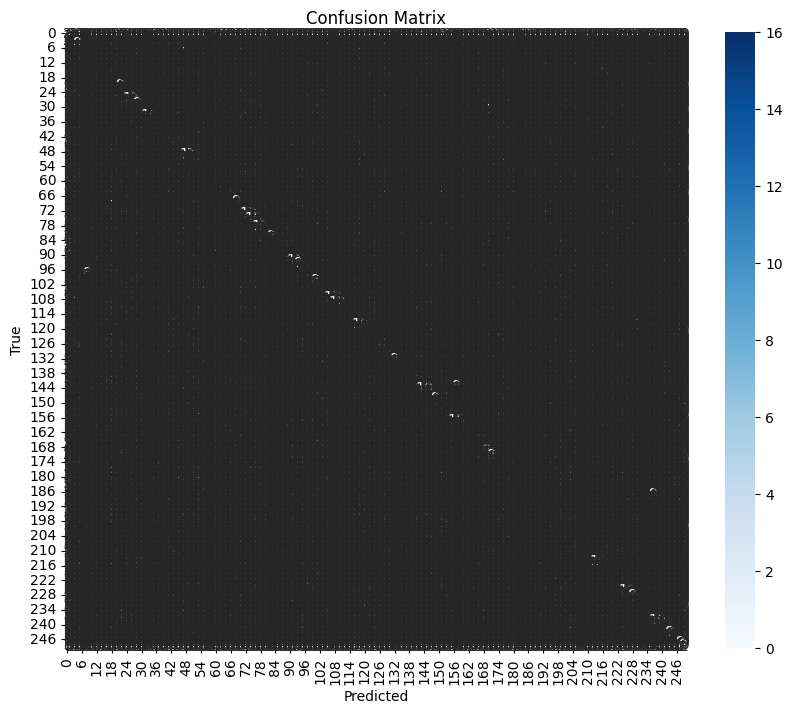

In [ ]:
# First, let's implement the prediction function for the custom DecisionTree class
def predict_single(node, x):
    """Predict class for a single sample using the decision tree."""
    if node.value is not None:  # Leaf node
        return node.value

    if x[node.feature] <= node.threshold:
        return predict_single(node.left, x)
    else:
        return predict_single(node.right, x)

# Add prediction method to the DecisionTree class
def predict(self, X):
    """Predict class for multiple samples."""
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()  # Convert DataFrame to NumPy array

    return np.array([predict_single(self.root, x) for x in X])

# Attach the method to the class
DecisionTree.predict = predict

# Now predict and calculate accuracy for our custom tree
y_pred_custom = tree.predict(X_test)
accuracy_custom = np.mean(y_pred_custom == y_test)
print(f"Custom Decision Tree Accuracy: {accuracy_custom:.4f}")

# Let's also compare with scikit-learn's implementation
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train scikit-learn decision tree
sklearn_tree = DecisionTreeClassifier(max_depth=23, random_state=42)
sklearn_tree.fit(X_train, y_train)

# Make predictions
y_pred_sklearn = sklearn_tree.predict(X_test)

# Calculate accuracy
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Scikit-learn Decision Tree Accuracy: {accuracy_sklearn:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_sklearn))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_sklearn))

# Visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_sklearn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()